In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'E:\ML\Datasets\diabetes.csv')

In [3]:
# from sklearn.datasets import load_diabetes
# data=load_diabetes()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.3,random_state=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=23,p=2) # n_neighbours and p for tuning

In [8]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=23)

In [9]:
ypred=model.predict(xtest)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7619047619047619

In [11]:
lacc=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    lacc.append(accuracy_score(ytest,model.predict(xtest)))
print(lacc)

[0.7575757575757576, 0.7229437229437229, 0.7359307359307359, 0.7229437229437229, 0.7705627705627706, 0.7575757575757576, 0.7619047619047619, 0.7489177489177489, 0.7489177489177489, 0.7532467532467533, 0.7662337662337663, 0.7705627705627706, 0.7748917748917749, 0.7662337662337663, 0.7878787878787878, 0.7922077922077922, 0.7878787878787878, 0.7705627705627706, 0.7705627705627706, 0.7792207792207793, 0.7792207792207793, 0.7705627705627706, 0.7619047619047619, 0.7619047619047619, 0.7705627705627706, 0.7575757575757576, 0.7705627705627706, 0.7575757575757576, 0.7662337662337663, 0.7835497835497836, 0.7835497835497836, 0.7662337662337663, 0.7705627705627706, 0.7705627705627706, 0.7662337662337663, 0.7705627705627706, 0.7662337662337663, 0.7532467532467533, 0.7532467532467533]


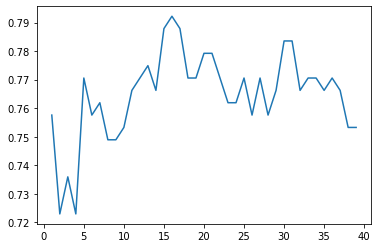

In [12]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,40),lacc)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[136,  10],
       [ 45,  40]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
lacc=[]
for i in range(10):
    k=0.1
    xtrain,xtest,ytrain, ytest=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=k,random_state=1)
    for j in range(1,40):
        clf=KNeighborsClassifier(n_neighbors=j,p=2)
        clf.fit(xtrain,ytrain)
        ypred=clf.predict(xtest)
        lacc.append((i,j,accuracy_score(ytest,clf.predict(xtest))))
    k=k+0.1
print(lacc)

[(0, 1, 0.7922077922077922), (0, 2, 0.7402597402597403), (0, 3, 0.7792207792207793), (0, 4, 0.7402597402597403), (0, 5, 0.7272727272727273), (0, 6, 0.7532467532467533), (0, 7, 0.7402597402597403), (0, 8, 0.7662337662337663), (0, 9, 0.7662337662337663), (0, 10, 0.7662337662337663), (0, 11, 0.7792207792207793), (0, 12, 0.7792207792207793), (0, 13, 0.7792207792207793), (0, 14, 0.7922077922077922), (0, 15, 0.7922077922077922), (0, 16, 0.7792207792207793), (0, 17, 0.7922077922077922), (0, 18, 0.7922077922077922), (0, 19, 0.7792207792207793), (0, 20, 0.7922077922077922), (0, 21, 0.7792207792207793), (0, 22, 0.8181818181818182), (0, 23, 0.8181818181818182), (0, 24, 0.8051948051948052), (0, 25, 0.8051948051948052), (0, 26, 0.8051948051948052), (0, 27, 0.7922077922077922), (0, 28, 0.7922077922077922), (0, 29, 0.7922077922077922), (0, 30, 0.7922077922077922), (0, 31, 0.8051948051948052), (0, 32, 0.7922077922077922), (0, 33, 0.7792207792207793), (0, 34, 0.7792207792207793), (0, 35, 0.779220779220

In [15]:
lacc.sort(key=lambda x:x[2],reverse=True)

In [16]:
lacc

[(0, 22, 0.8181818181818182),
 (0, 23, 0.8181818181818182),
 (1, 22, 0.8181818181818182),
 (1, 23, 0.8181818181818182),
 (2, 22, 0.8181818181818182),
 (2, 23, 0.8181818181818182),
 (3, 22, 0.8181818181818182),
 (3, 23, 0.8181818181818182),
 (4, 22, 0.8181818181818182),
 (4, 23, 0.8181818181818182),
 (5, 22, 0.8181818181818182),
 (5, 23, 0.8181818181818182),
 (6, 22, 0.8181818181818182),
 (6, 23, 0.8181818181818182),
 (7, 22, 0.8181818181818182),
 (7, 23, 0.8181818181818182),
 (8, 22, 0.8181818181818182),
 (8, 23, 0.8181818181818182),
 (9, 22, 0.8181818181818182),
 (9, 23, 0.8181818181818182),
 (0, 24, 0.8051948051948052),
 (0, 25, 0.8051948051948052),
 (0, 26, 0.8051948051948052),
 (0, 31, 0.8051948051948052),
 (1, 24, 0.8051948051948052),
 (1, 25, 0.8051948051948052),
 (1, 26, 0.8051948051948052),
 (1, 31, 0.8051948051948052),
 (2, 24, 0.8051948051948052),
 (2, 25, 0.8051948051948052),
 (2, 26, 0.8051948051948052),
 (2, 31, 0.8051948051948052),
 (3, 24, 0.8051948051948052),
 (3, 25, 0